In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize


#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm


import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter 

pi = np.pi

D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [2]:
mpt.rcParams['text.usetex'] = True
mpt.rcParams['text.latex.unicode'] = True


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [3]:
SAMPLE = 'ACQ085'

qc.config["core"]["db_location"] = r'E:\OneDrive - Rutgers University\files_py\expdata\Experiments_{}.db'.format(SAMPLE)
# automatically uses a different DB file for each month
initialise_database()
# creates a new DB file if nonexistant; leaves it untouched if file already exists

<IPython.core.display.Javascript object>


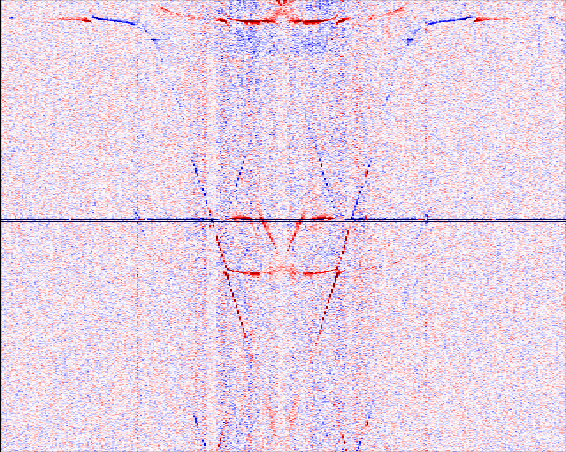

In [20]:


vmin = -1e-3
vmax =  1.0e-3







fig, ax = plt.subplots(figsize = (5,4))



axes1, new_colorbars1 = plot_by_id(233,ax, cmap = 'seismic')
axes2, new_colorbars2 = plot_by_id(249,ax, cmap = 'seismic')

ax.set_title('')
ax.get_children()[0].set_clim( vmin,vmax)
ax.get_children()[1].set_clim( vmin,vmax)

new_colorbars1[0].remove()
new_colorbars2[0].remove()



ax.set_xticks([6e-6, 12.0e-6, 18e-6])
ax.set_xticklabels([r'$0.25$', r'$0.5$', r'$0.75$'])
ax.set_xlabel(r'$\Phi/ \Phi_0$')
ax.set_ylabel(r'$f \, \mathrm{(GHz)}$')


plt.show()

Npts = 101
x = np.linspace(4e-6, 20e-6, Npts)
y_res = np.ones(Npts)*12.5e9
y_E = (12e-6 - x)*1e15*3.25 + 5e8



# ax.plot(x, y_res, 'w--', alpha = 0.25)
# ax.plot(x, y_E, 'w-', alpha = 0.25)


# ax.text(5.0e-6, 11.5e9, r'$f_{res}$', color = 'w', fontsize = 18)

# ax.text(10.0e-6, 8e9, r'$f_{01} $', color = 'w', fontsize = 18)


arr1 =  patches.Arrow( 6.5e-6, 11.5e9, 1e-6, 0.7e9,  width= 2e-7, color = 'w',  zorder=12) 
# arr2 =  patches.Arrow( 17.0e-6, 11.5e9,  1e-6, 0.7e9,  width= 2e-7, color = 'w',  zorder=12) 
# ax.add_patch(arr1)
# ax.add_patch(arr2)


# ax.text(15.5e-6, 11e9, r'$f_{res}$', color = 'w', fontsize = 18)

# arr1 =  patches.Arrow( 14.5e-6, 11.5e9, -1e-6, 0.7e9,  width= 2e-7, color = 'w',  zorder=12) 
# ax.add_patch(arr1)

ax.set_xlim(4e-6, 20e-6)
ax.set_ylim(5e8, 13e9)

# ax.get_children()

# plt.axis('off')

fig.subplots_adjust( left = 0.0, right = 1.00, bottom = 0.0, top = 1 )

plt.savefig('qubit_spec_.png', transperent = True)

In [17]:
plt.colorbar(im,fraction=0.046, pad=0.04)

AttributeError: 'numpy.ndarray' object has no attribute 'get_array'

<IPython.core.display.Javascript object>


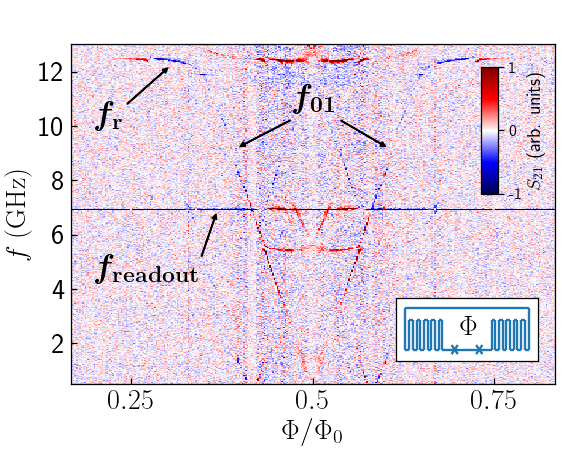

In [58]:


fig, ax = plt.subplots(figsize = (5,4))


im = plt.imread('qubit_spec_.png')
im1 = ax.imshow(im, zorder=0, extent=[4e-6, 20e-6,5e8, 13e9],  aspect='auto')

# im = plt.imread('qubit_inset.svg')
# ax.imshow(im, zorder=1, extent=[14e-6, 19e-6,1e9, 4e9],  aspect='auto')



ax.set_xlim(4e-6, 20e-6)
ax.set_ylim(5e8, 13e9)

ax.tick_params(direction="in")

ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))



ax.set_xticks([6e-6, 12.0e-6, 18e-6])
ax.set_xticklabels([r'$0.25$', r'$0.5$', r'$0.75$'], fontsize = 18)

ax.set_yticks([2e9, 4e9, 6e9, 8e9, 10e9, 12e9])
ax.set_yticklabels([2, 4, 6, 8, 10, 12], fontsize = 18)


ax.set_xlabel(r'$\Phi/ \Phi_0$', fontsize = 18)
ax.set_ylabel(r'$f \: \mathrm{(GHz)}$', fontsize = 18)

# ax.annotate(r'$f_{res}$', (0.05, 0.8), xycoords = 'axes fraction', color = 'w', fontsize = 18,
#             arrowprops = {})


fs = 21

ax.annotate(s = r'\boldmath $f_{\mathrm{r}}$', xy=(0.2, 0.93), xytext=(0.05, 0.75),
            arrowprops=dict(edgecolor = 'black' ,facecolor='black', width = 0.3, headwidth = 3, headlength = 3),
             xycoords = 'axes fraction', fontsize = fs, color = 'black')


ax.annotate(s = r'\boldmath $f_{\mathrm{readout}}$', xy=(0.3, 0.50), xytext=(0.05, 0.3),
            arrowprops=dict(edgecolor = 'black' ,facecolor='black', width = 0.3, headwidth = 3, headlength = 3),
             xycoords = 'axes fraction', fontsize = fs, color = 'black')


ax.annotate(s = r'\boldmath $f_{01}$', xy=(0.65, 0.70), xytext=(0.46, 0.8),
            arrowprops=dict(edgecolor = 'black' ,facecolor='black', width = 0.3, headwidth = 3, headlength = 3),
             xycoords = 'axes fraction', fontsize = fs, color = 'black')

ax.annotate(s = r'\boldmath $f_{01}$', xy=(0.35, 0.70), xytext=(0.46, 0.8),
            arrowprops=dict(edgecolor = 'black' ,facecolor='black', width = 0.3, headwidth = 3, headlength = 3),
            xycoords = 'axes fraction', fontsize = fs, color = 'black', alpha = 0)


ax.tick_params(direction="in")




fig.subplots_adjust(left=.125,right=0.98,top=0.9,bottom=.15)

left, bottom, width, height = [0.7, 0.2, 0.25, 0.2/1.425]
# left, bottom, width, height = [0.58, 0.04, 0.28, 0.28]


ax2 = fig.add_axes([left, bottom, width, height])

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlim(-0.75, 10.75)
ax2.set_ylim(-1.0, 4.35)

ax2.hlines(3.5, 0, 10, color = 'C0')
ax2.vlines(0, 0, 3.5 , color = 'C0')
ax2.vlines(10, 0, 3.5, color = 'C0')


dx = 0.3
for i in range(10):
    
    x_l = (i+1)*dx
    x_r = 10 - (i+1)*dx
    
    ax2.vlines(x_l, 0, 2.5, color = 'C0')
    ax2.vlines(x_r, 0, 2.5, color = 'C0')

    ax2.hlines(0,   x_l- ((i+1)%2 )*dx, x_l, color = 'C0')  
    ax2.hlines(2.5, x_l, x_l+((i+1)%2)*dx,   color = 'C0')  

    ax2.hlines(0,   x_r+ ((i+1)%2 )*dx, x_r, color = 'C0')  
    ax2.hlines(2.5, x_r, x_r-((i+1)%2)*dx,   color = 'C0')  
    
    
ax2.hlines(0, x_l, x_r, color = 'C0') 

ax2.plot([4-0.2, 4+0.2],[-0.3, 0.3 ], color = 'C0') 
ax2.plot([4+0.2, 4-0.2],[-0.3, 0.3 ], color = 'C0') 

ax2.plot([6-0.2, 6+0.2],[-0.3, 0.3 ], color = 'C0') 
ax2.plot([6+0.2, 6-0.2],[-0.3, 0.3 ], color = 'C0') 

ax2.text(4.4, 1.25, r'$\Phi$', fontsize = 18)

# plt.axis('off')


cmap = mpt.cm.seismic
# c = plt.colorbar(im1, cmap = cmap,  cax = fig.add_axes([0.85, 0.57, 0.03, 0.28]))
# c.set_cmap('seismic')
# c.set_clim( vmin,vmax)


cb1 = mpt.colorbar.ColorbarBase(fig.add_axes([0.85, 0.57, 0.03, 0.28]), cmap=cmap)
cb1.set_label(r'$S_{21}$ (arb. units)', fontsize = 12)
cb1.set_ticks([0,0.5,1])
cb1.set_ticklabels([-1,0,1])


plt.savefig('qubit_spec.pdf', transperent = True)


In [42]:
mpt.cm.seismic

<IPython.core.display.Javascript object>


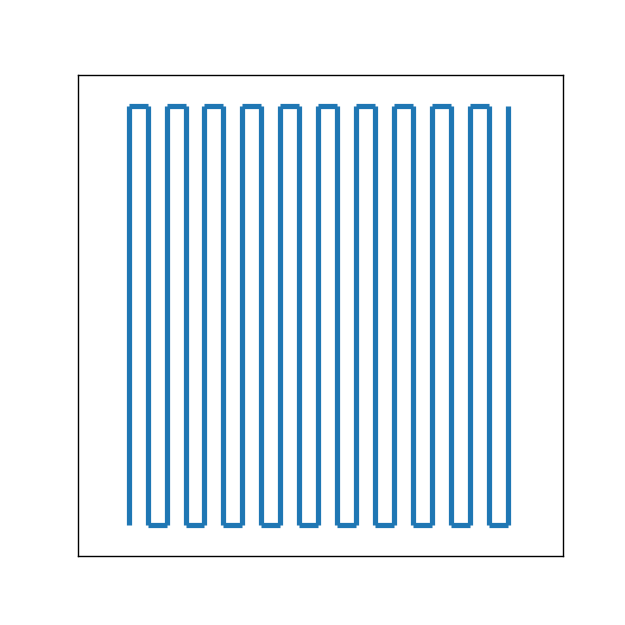

In [13]:
fig, ax2 = plt.subplots(figsize = (5,5))

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlim(-0.75, 10.75)
ax2.set_ylim(-0.75, 10.75)

# ax2.hlines(3.5, 0, 10, color = 'C0')
# ax2.vlines(0, 0, 3.5 , color = 'C0')
# ax2.vlines(10, 0, 3.5, color = 'C0')


dx = 0.45
lw = 3

N = 21
for i in range(N):
    
    x_l = (i+1)*dx
#     x_r = 10 - (i+1)*dx
    
    ax2.vlines(x_l, 0,10, color = 'C0', linewidth = lw)
#     ax2.vlines(x_r, 0, 2.5, color = 'C0')

    if i != 0:
        ax2.hlines(0,   x_l- ((i+1)%2 )*dx, x_l, color = 'C0',  linewidth = lw)  
    if i != N-1:
        ax2.hlines(10, x_l, x_l+((i+1)%2)*dx, color = 'C0', linewidth = lw)  

#     ax2.hlines(0,   x_r+ ((i+1)%2 )*dx, x_r, color = 'C0')  
#     ax2.hlines(2.5, x_r, x_r-((i+1)%2)*dx, color = 'C0')  
    
    
# ax2.hlines(0, x_l, x_r, color = 'C0') 

# ax2.plot([4-0.2, 4+0.2],[-0.3, 0.3 ], color = 'C0') 
# ax2.plot([4+0.2, 4-0.2],[-0.3, 0.3 ], color = 'C0') 

# ax2.plot([6-0.2, 6+0.2],[-0.3, 0.3 ], color = 'C0') 
# ax2.plot([6+0.2, 6-0.2],[-0.3, 0.3 ], color = 'C0') 

# ax2.text(4.4, 1.25, r'$\Phi$', fontsize = 18)

# plt.axis('off')


plt.savefig('meander.pdf', transperent = True)
